In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
import scipy
from tensorflow import keras
import pandas as pd
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
random.seed(42)

In [3]:
# Disables the GPU, was causing some problems
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

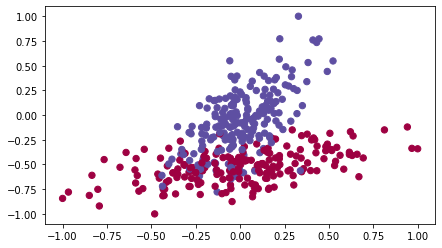

In [4]:
X, y = sklearn.datasets.make_classification(n_samples=400, n_features=2, n_classes=2, n_clusters_per_class=1,
                                            n_informative=2, n_redundant=0, n_repeated=0, random_state=0)
X = MinMaxScaler((-1, 1)).fit_transform(X)
plt.scatter(X[ :, 0], X[ :, 1], c=y, s=40, cmap=plt.cm.Spectral);

In [5]:
train_X, test_X, train_Y, test_Y  = train_test_split(X, y, test_size=0.35)

# Utils

In [6]:
dict_results = {}

EPOCHS = 5_000
BATCH_SIZE = 32

In [7]:
def create_model(layers_sizes, dropout=1, regularizer=None, name=None):
    inputs = keras.layers.Input(shape=(train_X.shape[-1], ))
    x = inputs
    for l in layers_sizes:
        x = keras.layers.Dense(l, activation="relu", kernel_regularizer=None)(x)
            
    x = keras.layers.Dense(1, activation="sigmoid")(x)
    model = keras.models.Model(inputs, x, name=name)
    model.compile("adam", loss="binary_crossentropy",
                 metrics=["accuracy", "binary_crossentropy"])
    
    return model

In [8]:
def plot_decision_regions(model, x, y, ax):
    xx, yy = np.meshgrid(np.arange(-1, 1, 0.01), np.arange(-1, 1, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5
    Z = Z.reshape(xx.shape)


    ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c="orange", label="negatives")
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c="green", label="positives");

In [9]:
callback = keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0,
    patience=50,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

# Non regularized small model

In [10]:
SIZES = [20, 3]

non_reg_small_model = create_model(SIZES, name="non_regularized_small_model")

2022-08-16 00:55:58.975303: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-16 00:55:58.994208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-16 00:55:58.994955: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-16 00:55:58.996898: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [11]:
history_non_reg_small = non_reg_small_model.fit(train_X, train_Y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0,
                                   validation_data=(test_X, test_Y))

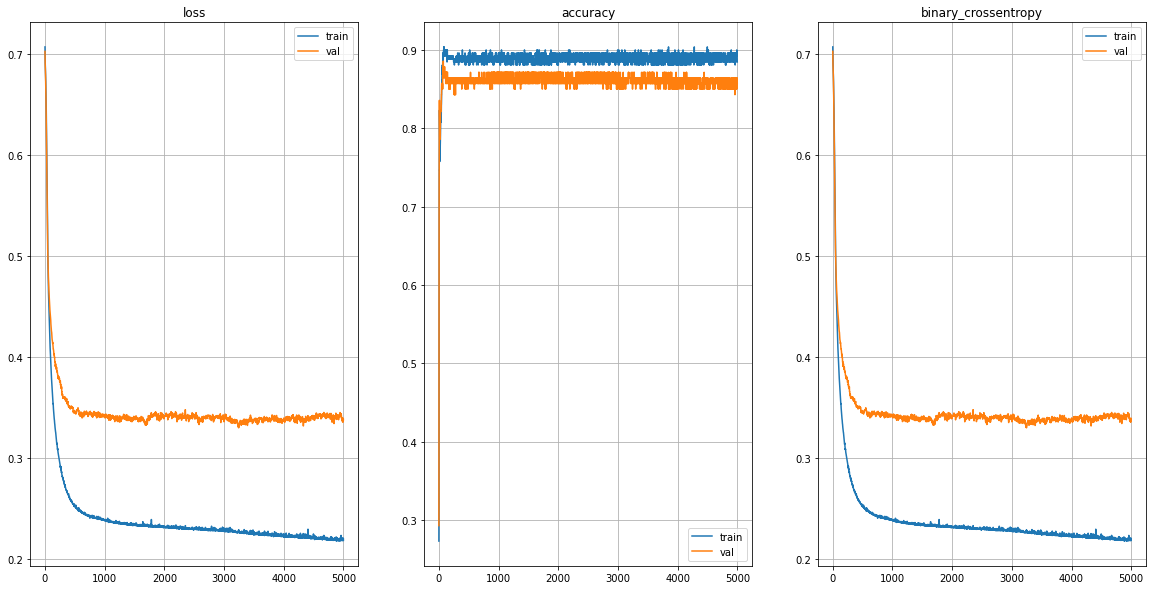

In [12]:
metrics = [m for m in history_non_reg_small.history.keys() if "val_" not in m]
fig, axs = plt.subplots(1, len(metrics), figsize=(20, 10))
for m, ax in zip(metrics, axs.flatten()):
    ax.plot(history_non_reg_small.history[m], label="train")
    ax.plot(history_non_reg_small.history["val_" + m], label="val")
    ax.set_title(m)
    ax.legend()
    ax.grid()

In [13]:
results_test = non_reg_small_model.evaluate(test_X, test_Y, verbose=0)[1]
print(f"ACC NON REG: {results_test}")

ACC NON REG: 0.8571428656578064


In [14]:
dict_results["non_reg_small"] = results_test

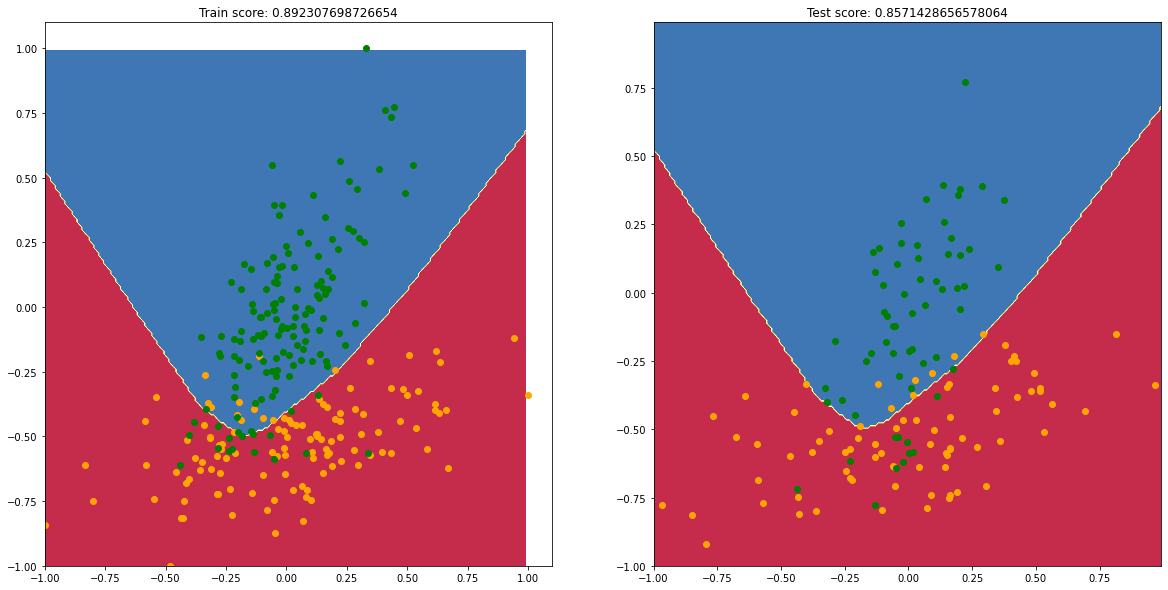

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

plot_decision_regions(non_reg_small_model, train_X, train_Y, axs[0])
axs[0].set_title(f"Train score: {non_reg_small_model.evaluate(train_X, train_Y, verbose=0)[1]}")


plot_decision_regions(non_reg_small_model, test_X, test_Y, axs[1])
axs[1].set_title(f"Test score: {non_reg_small_model.evaluate(test_X, test_Y, verbose=0)[1]}");
    

# Non regularized large model

In [16]:
SIZES = [20, 30, 40, 50, 40, 30, 10, 5]

non_reg_large_model = create_model(SIZES, name="non_regularized_large_model")

In [17]:
history_non_reg_large = non_reg_large_model.fit(train_X, train_Y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0,
                                   validation_data=(test_X, test_Y))

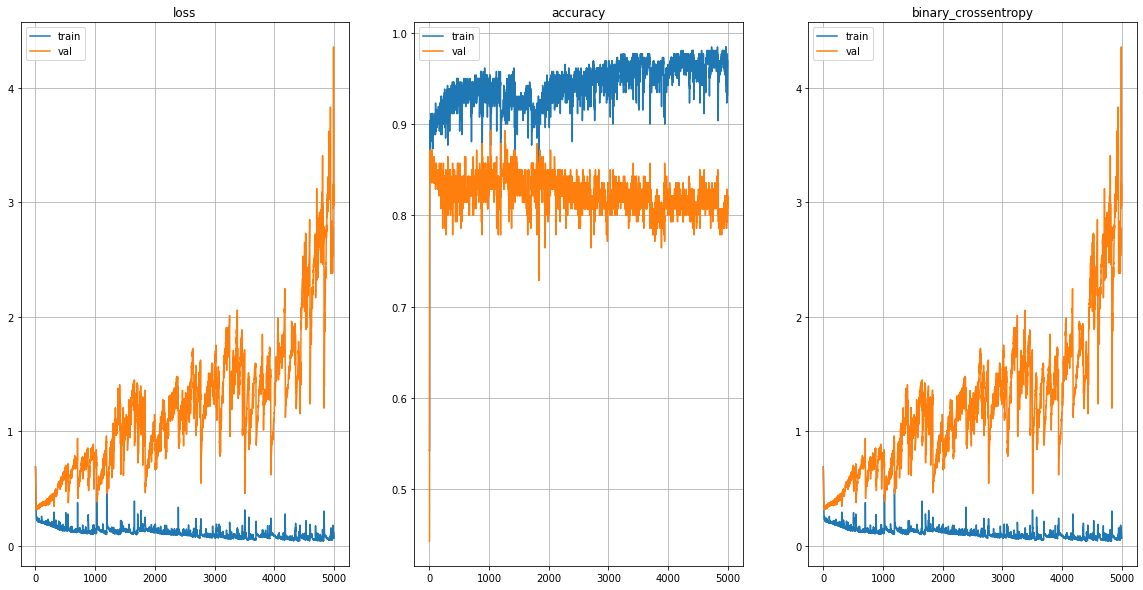

In [18]:
metrics = [m for m in history_non_reg_large.history.keys() if "val_" not in m]
fig, axs = plt.subplots(1, len(metrics), figsize=(20, 10))
for m, ax in zip(metrics, axs.flatten()):
    ax.plot(history_non_reg_large.history[m], label="train")
    ax.plot(history_non_reg_large.history["val_" + m], label="val")
    ax.set_title(m)
    ax.legend()
    ax.grid()

In [19]:
results_test = non_reg_large_model.evaluate(test_X, test_Y, verbose=0)[1]
print(f"ACC NON REG LARGE: {results_test}")

ACC NON REG LARGE: 0.800000011920929


In [20]:
dict_results["non_reg_large"] = results_test

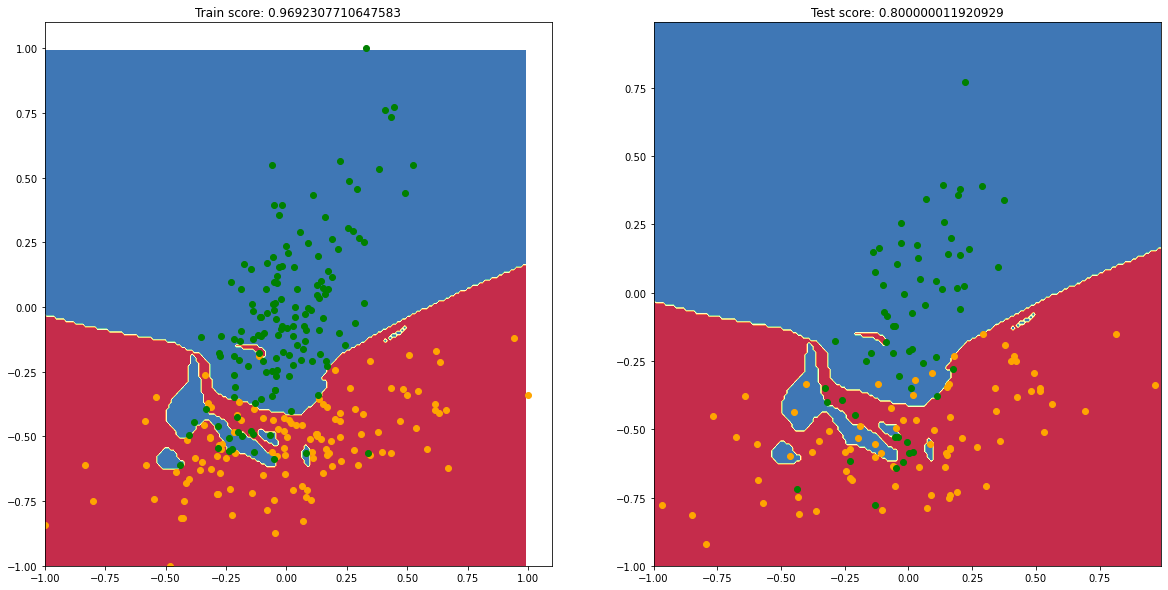

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

plot_decision_regions(non_reg_large_model, train_X, train_Y, axs[0])
axs[0].set_title(f"Train score: {non_reg_large_model.evaluate(train_X, train_Y, verbose=0)[1]}")


plot_decision_regions(non_reg_large_model, test_X, test_Y, axs[1])
axs[1].set_title(f"Test score: {non_reg_large_model.evaluate(test_X, test_Y, verbose=0)[1]}");
    

# L2 regularization

In [22]:


SIZES = [20, 30, 40, 50, 40, 30, 10, 5]

lambdb = 0.9
factor = lambdb / (2 * BATCH_SIZE)

l2_reg_large_model = create_model(SIZES, regularizer=keras.regularizers.L2(factor), name="l2_regularized_large_model")

In [23]:
l2_reg_large_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.3),
                     loss="binary_crossentropy",
                     metrics=["accuracy", "binary_crossentropy"])

In [24]:
history_l2reg = l2_reg_large_model.fit(train_X, train_Y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0,
                                       validation_data=(test_X, test_Y))

In [25]:
results_test = l2_reg_large_model.evaluate(test_X, test_Y, verbose=0)[1]
print(f"ACC L2 REG: {results_test}")

ACC L2 REG: 0.8500000238418579


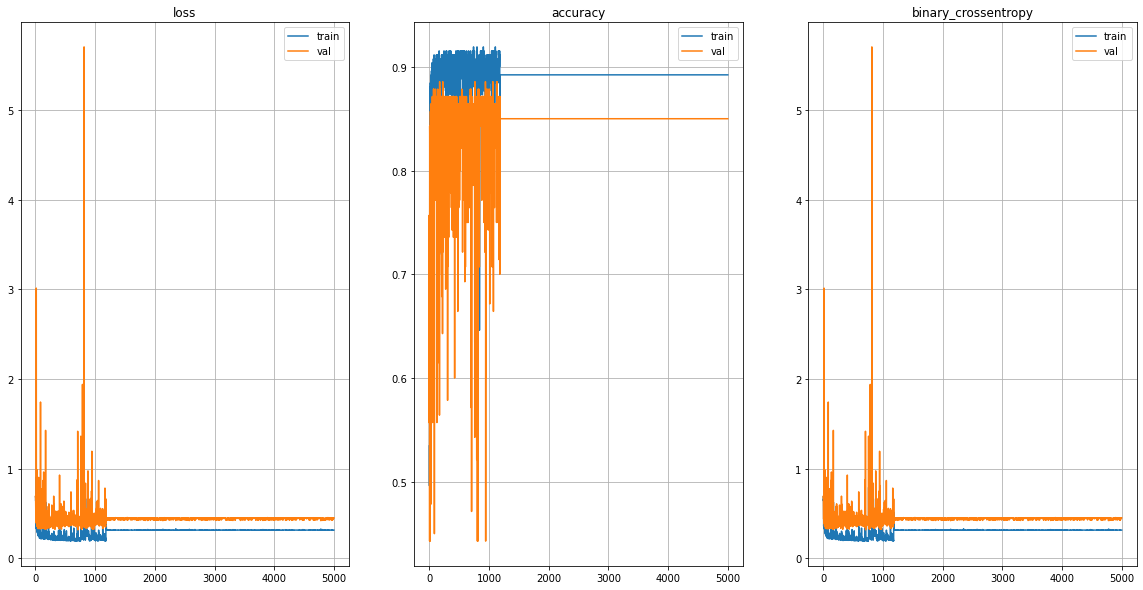

In [26]:
metrics = [m for m in history_l2reg.history.keys() if "val_" not in m]
fig, axs = plt.subplots(1, len(metrics), figsize=(20, 10))
for m, ax in zip(metrics, axs.flatten()):
    ax.plot(history_l2reg.history[m], label="train")
    ax.plot(history_l2reg.history["val_" + m], label="val")
    ax.set_title(m)
    ax.legend()
    ax.grid()

In [27]:
dict_results["l2_reg"] = results_test

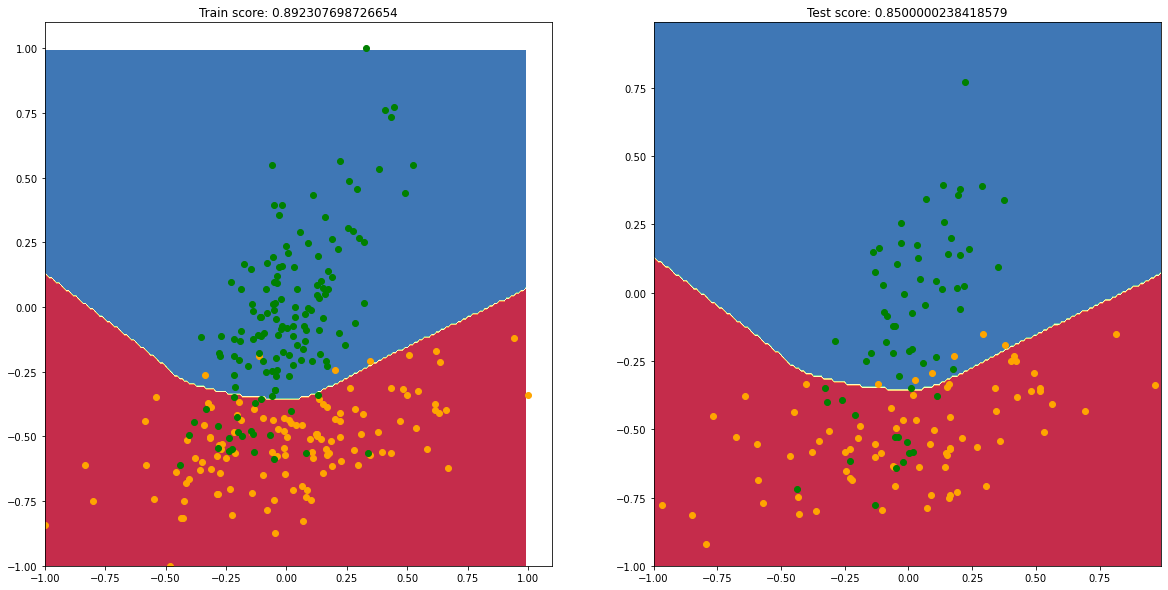

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

plot_decision_regions(l2_reg_large_model, train_X, train_Y, axs[0])
axs[0].set_title(f"Train score: {l2_reg_large_model.evaluate(train_X, train_Y, verbose=0)[1]}")


plot_decision_regions(l2_reg_large_model, test_X, test_Y, axs[1])
axs[1].set_title(f"Test score: {l2_reg_large_model.evaluate(test_X, test_Y, verbose=0)[1]}");

# L1 regularization

In [44]:
lambdb = 0.4
factor = lambdb / (2 * BATCH_SIZE)

SIZES = [20, 30, 40, 50, 40, 30, 10, 5]

l1_reg_large_model = create_model(SIZES, regularizer=keras.regularizers.L1(factor), name="l1_regularized_large_model")

In [45]:
l1_reg_large_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.3),
                     loss="binary_crossentropy",
                     metrics=["accuracy", "binary_crossentropy"])

In [46]:
history_l1reg = l1_reg_large_model.fit(train_X, train_Y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0,
                                   validation_data=(test_X, test_Y))

In [47]:
results_test = l1_reg_large_model.evaluate(test_X, test_Y, verbose=0)[1]
print(f"ACC L1 REG: {results_test}")

ACC L1 REG: 0.8714285492897034


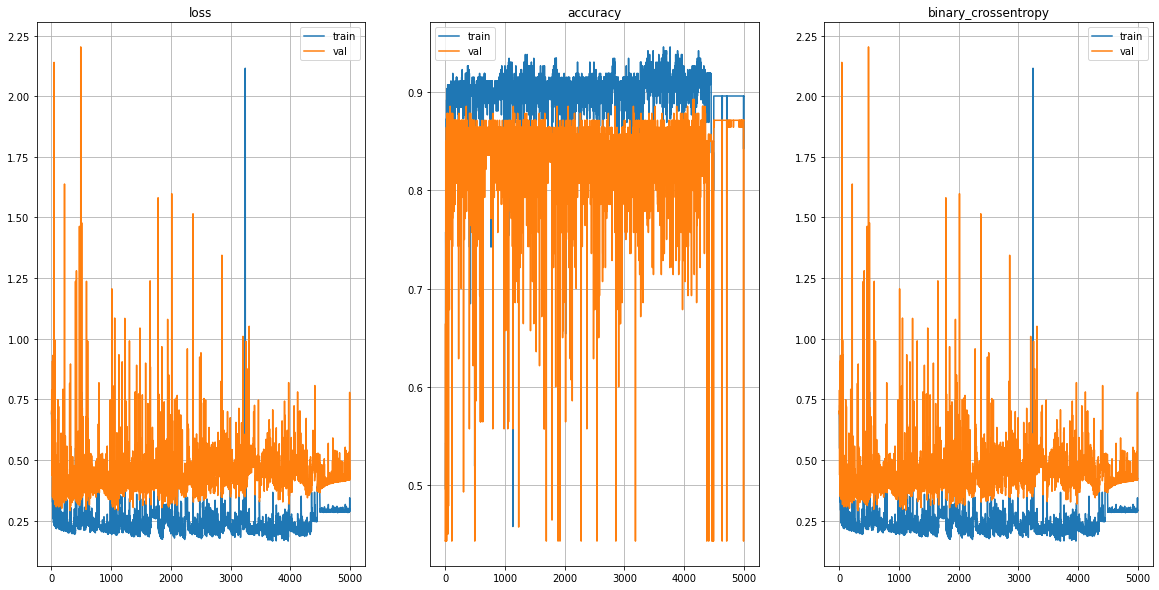

In [48]:
metrics = [m for m in history_l1reg.history.keys() if "val_" not in m]
fig, axs = plt.subplots(1, len(metrics), figsize=(20, 10))
for m, ax in zip(metrics, axs.flatten()):
    ax.plot(history_l1reg.history[m], label="train")
    ax.plot(history_l1reg.history["val_" + m], label="val")
    ax.set_title(m)
    ax.legend()
    ax.grid()

In [49]:
dict_results["l1_reg"] = results_test

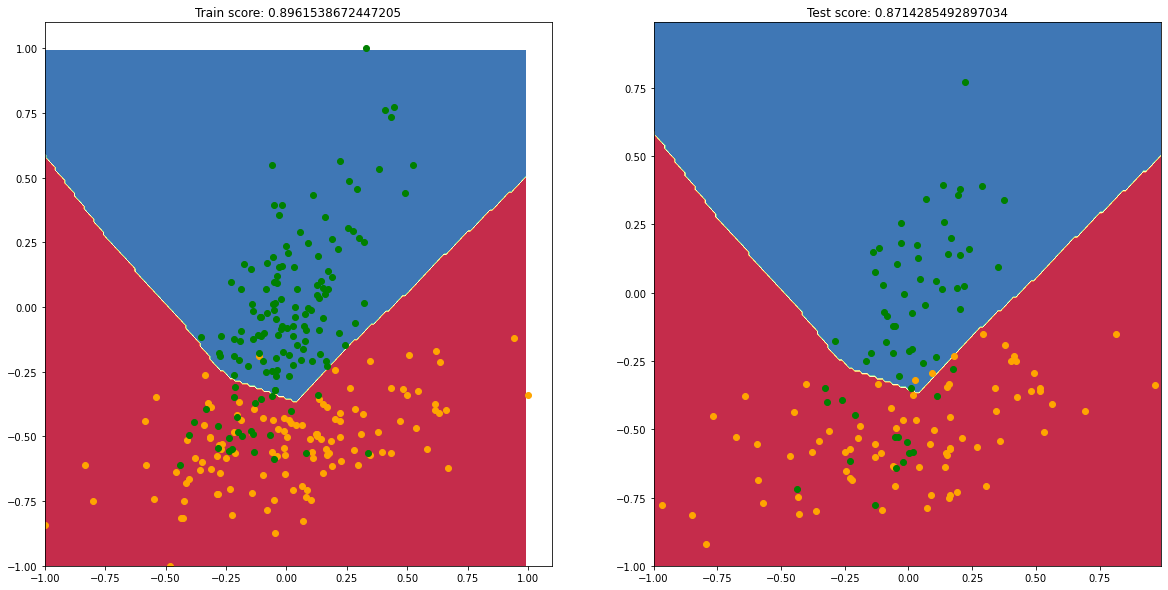

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

plot_decision_regions(l1_reg_large_model, train_X, train_Y, axs[0])
axs[0].set_title(f"Train score: {l1_reg_large_model.evaluate(train_X, train_Y, verbose=0)[1]}")


plot_decision_regions(l1_reg_large_model, test_X, test_Y, axs[1])
axs[1].set_title(f"Test score: {l1_reg_large_model.evaluate(test_X, test_Y, verbose=0)[1]}");

# Dropout regularization

In [36]:
SIZES = [20, 30, 40, 50, 40, 30, 10, 5]

DR_RATE = 0.2

dropout_reg_large_model = create_model(SIZES, dropout=DR_RATE, name="dropout_regularized_large_model")

In [37]:
dropout_reg_large_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.3),
                     loss="binary_crossentropy",
                     metrics=["accuracy", "binary_crossentropy"])

In [38]:
history_dropout = dropout_reg_large_model.fit(train_X, train_Y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0,
                                   validation_data=(test_X, test_Y))

In [39]:
results_test = dropout_reg_large_model.evaluate(test_X, test_Y, verbose=0)[1]
print(f"ACC DROPOUT REG: {results_test}")

ACC DROPOUT REG: 0.8071428537368774


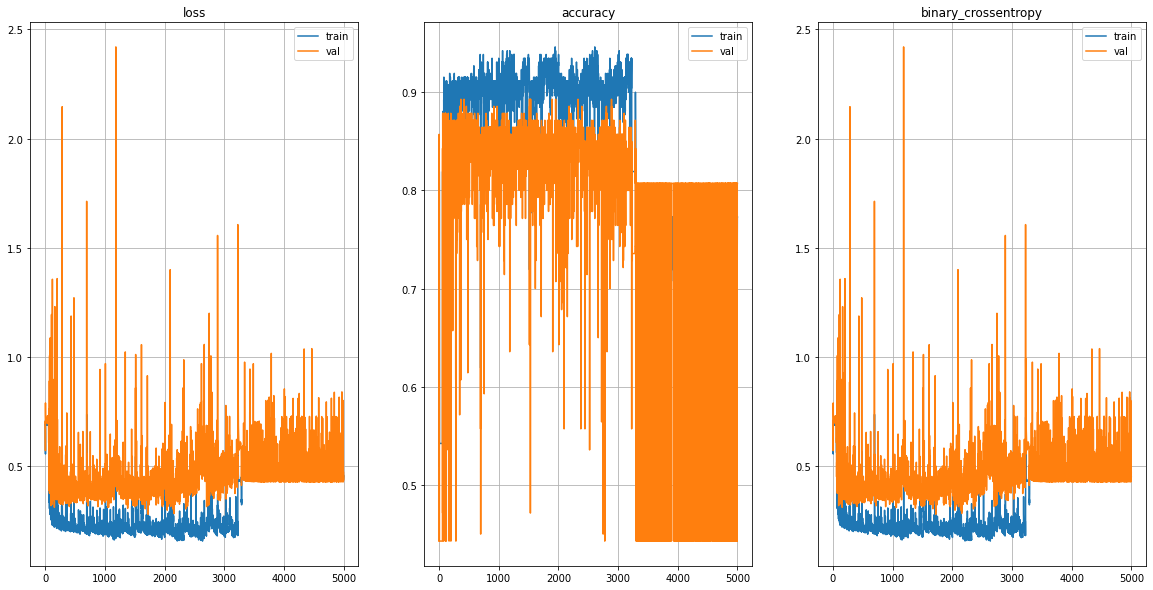

In [40]:
metrics = [m for m in history_dropout.history.keys() if "val_" not in m]
fig, axs = plt.subplots(1, len(metrics), figsize=(20, 10))
for m, ax in zip(metrics, axs.flatten()):
    ax.plot(history_dropout.history[m], label="train")
    ax.plot(history_dropout.history["val_" + m], label="val")
    ax.set_title(m)
    ax.legend()
    ax.grid()

In [41]:
dict_results["dropout_reg"] = results_test

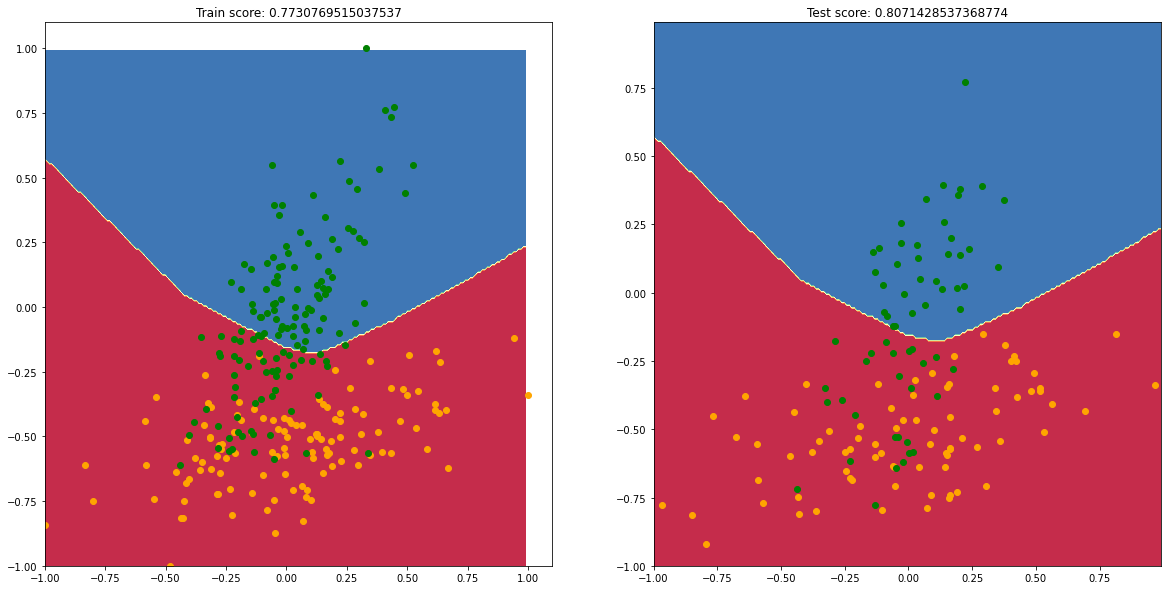

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

plot_decision_regions(dropout_reg_large_model, train_X, train_Y, axs[0])
axs[0].set_title(f"Train score: {dropout_reg_large_model.evaluate(train_X, train_Y, verbose=0)[1]}")


plot_decision_regions(dropout_reg_large_model, test_X, test_Y, axs[1])
axs[1].set_title(f"Test score: {dropout_reg_large_model.evaluate(test_X, test_Y, verbose=0)[1]}");

# Results

In [51]:
pd.DataFrame(dict_results.values(), dict_results.keys(), columns=["accuracy"])

,accuracy
non_reg_small,0.857143
non_reg_large,0.800000
l2_reg,0.850000
l1_reg,0.871429
dropout_reg,0.807143
